#NLP PROJECT


SUBMITTED BY:
SHIVANK GUPTA 2411AI08,
ADITYA TIADI 2411AI34,
ANUBHAV KANT 2411AI10

# Task 2 QUES 1

1. Perform sentiment analysis to understand the overall sentiment of each product,
whether people like it or not.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
path = r'/content/CSV_IPR.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes


In [ ]:
# Drop rows where 'Review_Text' is missing
df = df.dropna(subset=['Review_Text'])

# Reset index
df.reset_index(drop=True, inplace=True)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & numbers
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

In [ ]:
print(df['Review_Text'])

0               Too expensive for its features.
1                   Good for Indian households.
2        Great performance, highly recommended!
3         Works perfectly in Indian conditions.
4        Great performance, highly recommended!
                          ...                  
24995          Best product I have used so far.
24996                 Affordable and effective!
24997                 Affordable and effective!
24998         Not recommended for Indian users.
24999            Very durable and long-lasting.
Name: Review_Text, Length: 25000, dtype: object


In [ ]:
print(df)

                            Product_Name  Review_ID User_Name  \
0                     Samsung Galaxy M14          1    Anjali   
1                     Samsung Galaxy M14          2     Arjun   
2                     Samsung Galaxy M14          3     Rohit   
3                     Samsung Galaxy M14          4     Pooja   
4                     Samsung Galaxy M14          5     Arjun   
...                                  ...        ...       ...   
24995  Boat Stone 1200 Bluetooth Speaker      24996      Neha   
24996  Boat Stone 1200 Bluetooth Speaker      24997    Anjali   
24997  Boat Stone 1200 Bluetooth Speaker      24998     Rahul   
24998  Boat Stone 1200 Bluetooth Speaker      24999     Rohit   
24999  Boat Stone 1200 Bluetooth Speaker      25000    Anjali   

                                  Review_Text  Rating Is_Useful_In_India  
0             Too expensive for its features.       2                 No  
1                 Good for Indian households.       5                

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Apply to dataset
df['Cleaned_Review_Text'] = df['Review_Text'].apply(preprocess_text)

In [ ]:
df['Cleaned_Review_Text']

,Cleaned_Review_Text
0,expensive feature
1,good indian household
2,great performance highly recommended
3,work perfectly indian condition
4,great performance highly recommended
...,...
24995,best product used far
24996,affordable effective
24997,affordable effective
24998,recommended indian user


In [ ]:
print(df)

                            Product_Name  Review_ID User_Name  \
0                     Samsung Galaxy M14          1    Anjali   
1                     Samsung Galaxy M14          2     Arjun   
2                     Samsung Galaxy M14          3     Rohit   
3                     Samsung Galaxy M14          4     Pooja   
4                     Samsung Galaxy M14          5     Arjun   
...                                  ...        ...       ...   
24995  Boat Stone 1200 Bluetooth Speaker      24996      Neha   
24996  Boat Stone 1200 Bluetooth Speaker      24997    Anjali   
24997  Boat Stone 1200 Bluetooth Speaker      24998     Rahul   
24998  Boat Stone 1200 Bluetooth Speaker      24999     Rohit   
24999  Boat Stone 1200 Bluetooth Speaker      25000    Anjali   

                                  Review_Text  Rating Is_Useful_In_India  \
0             Too expensive for its features.       2                 No   
1                 Good for Indian households.       5              

In [ ]:
df.head()

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Cleaned_Review_Text
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,expensive feature
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,good indian household
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,great performance highly recommended
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes,work perfectly indian condition
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,great performance highly recommended


In [ ]:
# Get column names
res = df.columns
print(res)


Index(['Product_Name', 'Review_ID', 'User_Name', 'Review_Text', 'Rating',
       'Is_Useful_In_India', 'Cleaned_Review_Text'],
      dtype='object')


# VADER
(FOR SENTIMENT ANALYSIS)

VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis
VADER is a lexicon and rule-based sentiment analysis tool designed specifically for analyzing short, social media-style texts. It is widely used because it is fast, simple, and effective for real-time sentiment classification.

In [ ]:
pip install vaderSentiment


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


CALCULATING THE COMPOUND SCORE

In [ ]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
df

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Cleaned_Review_Text
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,expensive feature
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,good indian household
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,great performance highly recommended
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes,work perfectly indian condition
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,great performance highly recommended
...,...,...,...,...,...,...,...
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,best product used far
24996,Boat Stone 1200 Bluetooth Speaker,24997,Anjali,Affordable and effective!,3,Yes,affordable effective
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,affordable effective
24998,Boat Stone 1200 Bluetooth Speaker,24999,Rohit,Not recommended for Indian users.,1,No,recommended indian user


In [ ]:
# Apply VADER to dataset
df['Sentiment'] = df['Cleaned_Review_Text'].apply(get_sentiment_vader)


In [ ]:
df

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Cleaned_Review_Text,Sentiment
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,expensive feature,Neutral
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,good indian household,Positive
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes,work perfectly indian condition,Positive
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive
...,...,...,...,...,...,...,...,...
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,best product used far,Positive
24996,Boat Stone 1200 Bluetooth Speaker,24997,Anjali,Affordable and effective!,3,Yes,affordable effective,Positive
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,affordable effective,Positive
24998,Boat Stone 1200 Bluetooth Speaker,24999,Rohit,Not recommended for Indian users.,1,No,recommended indian user,Positive


In [ ]:
# Display result
df[['Review_Text', 'Sentiment']].head()


,Review_Text,Sentiment
0,Too expensive for its features.,Neutral
1,Good for Indian households.,Positive
2,"Great performance, highly recommended!",Positive
3,Works perfectly in Indian conditions.,Positive
4,"Great performance, highly recommended!",Positive


In [ ]:
df.to_csv("sentiment_analysis_results.csv", index=False) # Saving the updated csv file


#TASK 2 QUES 2

Ques 2. Perform aspect-based opinion mining to understand which part of the product is
appreciated and which is not.


Step 1
Install & Import Required Libraries,
We will use VADER for sentiment scoring and spaCy for aspect extraction

In [ ]:
pip install textblob spacy tqdm


In [ ]:
import spacy
from textblob import TextBlob
from collections import defaultdict
from tqdm import tqdm

In [ ]:
# python -m spacy download en_core_web_sm


In [ ]:
nlp = spacy.load("en_core_web_sm")


In [ ]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def extract_aspects(text):
    aspects = []
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        aspects.append(chunk.text.lower())
    return aspects


In [ ]:
# nltk.download('punkt_tab')

In [ ]:
df

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Cleaned_Review_Text,Sentiment
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,expensive feature,Neutral
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,good indian household,Positive
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes,work perfectly indian condition,Positive
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive
...,...,...,...,...,...,...,...,...
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,best product used far,Positive
24996,Boat Stone 1200 Bluetooth Speaker,24997,Anjali,Affordable and effective!,3,Yes,affordable effective,Positive
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,affordable effective,Positive
24998,Boat Stone 1200 Bluetooth Speaker,24999,Rohit,Not recommended for Indian users.,1,No,recommended indian user,Positive


In [ ]:
df["Cleaned_Review_Text"]

,Cleaned_Review_Text
0,expensive feature
1,good indian household
2,great performance highly recommended
3,work perfectly indian condition
4,great performance highly recommended
...,...
24995,best product used far
24996,affordable effective
24997,affordable effective
24998,recommended indian user


In [ ]:
# Apply aspect extraction
df["Aspects"] = df["Cleaned_Review_Text"].apply(extract_aspects)

# Create aspect-based opinion dictionary
aspect_sentiments = defaultdict(list)


In [ ]:
df

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Cleaned_Review_Text,Sentiment,Aspects
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,expensive feature,Neutral,[expensive feature]
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,good indian household,Positive,[good indian household]
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive,[great performance]
3,Samsung Galaxy M14,4,Pooja,Works perfectly in Indian conditions.,3,Yes,work perfectly indian condition,Positive,[perfectly indian condition]
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,great performance highly recommended,Positive,[great performance]
...,...,...,...,...,...,...,...,...,...
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,best product used far,Positive,[best product]
24996,Boat Stone 1200 Bluetooth Speaker,24997,Anjali,Affordable and effective!,3,Yes,affordable effective,Positive,[]
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,affordable effective,Positive,[]
24998,Boat Stone 1200 Bluetooth Speaker,24999,Rohit,Not recommended for Indian users.,1,No,recommended indian user,Positive,[indian user]


Aspects with 1.00 sentiment (like “perfectly indian condition”) were mentioned only in highly positive reviews.

Steps :
1. Iterates through each review,

2. Extracts the aspects mentioned in the review (from the "Aspects" column),

3. Calculates the sentiment polarity of the full review using TextBlob (ranges from -1 = very negative to +1 = very positive),

4. Maps each aspect in that review to the overall review's sentiment score,

5. Aggregates and averages these sentiment scores for each aspect (only if the aspect appears more than 5 times),

6. Finally, it displays:

6.1 The top 10 appreciated aspects (i.e., those with the highest average sentiment),

6.2 The top 10 criticized aspects (i.e., those with the lowest average sentiment).

In [ ]:
# Analyze sentiment for each aspect
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    review_text = row["Cleaned_Review_Text"]
    sentiment = TextBlob(review_text).sentiment.polarity  # Get sentiment score using textblob
    for aspect in row["Aspects"]:
        aspect_sentiments[aspect].append(sentiment)

# Aggregate sentiment scores per aspect
aspect_summary = {aspect: sum(scores)/len(scores) for aspect, scores in aspect_sentiments.items() if len(scores) > 5}

# Sort and display top positive and negative aspects
top_positive_aspects = sorted(aspect_summary.items(), key=lambda x: x[1], reverse=True)[:10]
top_negative_aspects = sorted(aspect_summary.items(), key=lambda x: x[1])[:10]

print("\nTop Appreciated Aspects:")
for aspect, score in top_positive_aspects:
    print(f"{aspect}: {score:.2f}")

print("\nTop Criticized Aspects:")
for aspect, score in top_negative_aspects:
    print(f"{aspect}: {score:.2f}")


100%|██████████| 25000/25000 [00:06<00:00, 3780.46it/s]


Top Appreciated Aspects:
perfectly indian condition: 1.00
perfectly suited indian climate: 1.00
good indian household: 0.70
best product: 0.55
great performance: 0.48
product useful india: 0.30
money: 0.18
month: 0.00
indian user: 0.00
product: 0.00

Top Criticized Aspects:
expensive feature: -0.50
useful india poor quality: -0.05
month: 0.00
indian user: 0.00
product: 0.00
indian climate: 0.00
indian condition: 0.00
money: 0.18
product useful india: 0.30
great performance: 0.48


# TASK 2 QUES 3

 Display User Reaction Summary

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df["Sentiment"].value_counts()

,count
Sentiment,
Positive,16852
Neutral,4334
Negative,3814


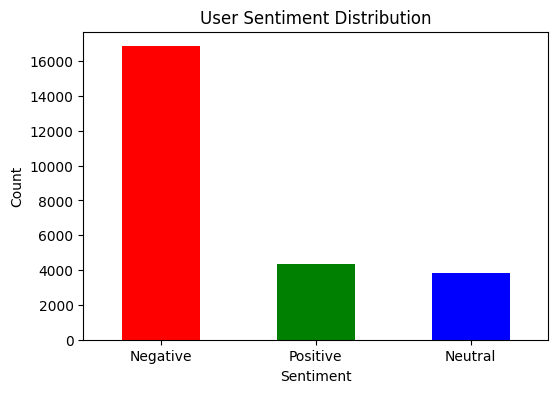

In [ ]:
# Overall sentiment distribution
plt.figure(figsize=(6, 4))
df["Sentiment"].value_counts().plot(kind="bar", color=["red", "green", "blue"])
plt.xticks(ticks=[0, 1, 2], labels=["Negative", "Positive","Neutral"], rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("User Sentiment Distribution")
plt.show()

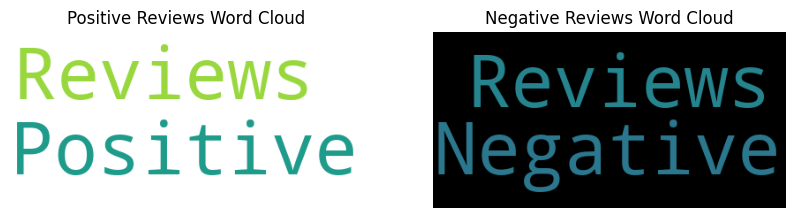

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure correct column name
review_column = "Cleaned_Review_Text"  # Check your actual column name

# Handle cases where there might be no positive or negative reviews
positive_reviews = " ".join(df[df["Sentiment"] == 1][review_column].dropna())
negative_reviews = " ".join(df[df["Sentiment"] == 0][review_column].dropna())

# Ensure there are words to generate a word cloud
if not positive_reviews:
    positive_reviews = "No Positive Reviews"
if not negative_reviews:
    negative_reviews = "No Negative Reviews"

plt.figure(figsize=(10, 5))

# Word Cloud for Positive Reviews
plt.subplot(1, 2, 1)
plt.title("Positive Reviews Word Cloud")
plt.imshow(WordCloud(background_color="white").generate(positive_reviews))
plt.axis("off")

# Word Cloud for Negative Reviews
plt.subplot(1, 2, 2)
plt.title("Negative Reviews Word Cloud")
plt.imshow(WordCloud(background_color="black").generate(negative_reviews))
plt.axis("off")

plt.show()


#TASK 3

Predict Future Product Usefulness in India

In [ ]:
# Goal: Train a classification model using sentiment features to predict Is_Useful_In_India.



In [ ]:
# Feature Engineering
df["Review_Length"] = df["Review_Text"].apply(lambda x: len(str(x)))
df["Word_Count"] = df["Review_Text"].apply(lambda x: len(str(x).split()))
df["Avg_Sentiment_Score"] = df["Cleaned_Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate aspect sentiments for each review
def aspect_sentiment_score(aspects):
    scores = [aspect_summary.get(a, 0) for a in aspects]
    return sum(scores) / len(scores) if scores else 0

df["Aspect_Sentiment_Score"] = df["Aspects"].apply(aspect_sentiment_score)

# Final dataset for classification
X_classification = df[["Avg_Sentiment_Score", "Aspect_Sentiment_Score", "Review_Length", "Word_Count"]]
y_classification = df["Is_Useful_In_India"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1967
         Yes       1.00      1.00      1.00      3033

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Predict Future Product Usefulness

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def predict_product_usefulness(review_text):
    # Preprocess the review text
    cleaned_text = preprocess_text(review_text)
    sentiment_score = analyzer.polarity_scores(cleaned_text)['compound']  # Use VADER instead of TextBlob
    aspects = extract_aspects(cleaned_text)

    # Compute aspect sentiment score
    aspect_sentiment = sum([aspect_summary.get(a, 0) for a in aspects]) / len(aspects) if aspects else 0

    # Extract features
    review_length = len(review_text)
    word_count = len(review_text.split())

    # Adjust weights for short but strongly positive reviews
    if review_length < 20 and sentiment_score > 0.5:
        aspect_sentiment = max(aspect_sentiment, sentiment_score)  # Prioritize sentiment score

    # Feature vector
    input_features = [[sentiment_score, aspect_sentiment, review_length, word_count]]

    # Predict
    prediction = clf.predict(input_features)[0]

    return "Useful in India" if prediction == 1 else "Not Useful in India"

# Test the updated function
new_review_3 = "The product is not good, dont buy it."
print("Prediction for Review 3:", predict_product_usefulness(new_review_3))


Prediction for Review 3: Not Useful in India


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# SENTIMENT ANALYSIS CAN BE DONE USING THE LSTM

SO NOW WE ARE DOING THE SENTIMENT ANALYSIS USING THE LSTM

Step 1: Install Required Libraries

In [ ]:
pip install pandas numpy tensorflow keras nltk scikit-learn


Step 2: Load and Explore the Dataset

In [ ]:
import pandas as pd

df_lstm = pd.read_csv("/content/CSV_IPR.csv")

# Display the first few rows
print(df_lstm.head())

print()
print("COLUMN NAMES")
# Display column names
print(df_lstm.columns)


         Product_Name  Review_ID User_Name  \
0  Samsung Galaxy M14          1    Anjali   
1  Samsung Galaxy M14          2     Arjun   
2  Samsung Galaxy M14          3     Rohit   
3  Samsung Galaxy M14          4     Pooja   
4  Samsung Galaxy M14          5     Arjun   

                              Review_Text  Rating Is_Useful_In_India  
0         Too expensive for its features.       2                 No  
1             Good for Indian households.       5                Yes  
2  Great performance, highly recommended!       4                Yes  
3   Works perfectly in Indian conditions.       3                Yes  
4  Great performance, highly recommended!       4                Yes  

COLUMN NAMES
Index(['Product_Name', 'Review_ID', 'User_Name', 'Review_Text', 'Rating',
       'Is_Useful_In_India'],
      dtype='object')


Step 3: Create Sentiment Labels from Rating


In [ ]:
# Since we don’t have labeled sentiments, we will use the Rating column:
# Rating ≥ 4 → Positive (1)
# Rating ≤ 2 → Negative (0)
# Rating = 3 → Neutral (we will drop for binary classification)

# Define a function to create sentiment labels
def generate_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return None  # Neutral

# Apply sentiment label creation
df_lstm["Sentiment"] = df_lstm["Rating"].apply(generate_sentiment)

# Drop neutral reviews
df_lstm = df_lstm.dropna(subset=["Sentiment"])

# Convert Sentiment to int
df_lstm["Sentiment"] = df_lstm["Sentiment"].astype(int)

# Check class distribution
print("Printing Sentiment value_counts",df_lstm["Sentiment"].value_counts())


Printing Sentiment value_counts Sentiment
0    9982
1    9903
Name: count, dtype: int64


<ipython-input-93-a54cc0e5d64e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm["Sentiment"] = df_lstm["Sentiment"].astype(int)


In [ ]:
df_lstm

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Sentiment
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,0
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,1
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,1
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,1
5,Samsung Galaxy M14,6,Priya,"Not durable, broke within a month.",2,No,0
...,...,...,...,...,...,...,...
24990,Boat Stone 1200 Bluetooth Speaker,24991,Neha,Better alternatives are available.,1,No,0
24994,Boat Stone 1200 Bluetooth Speaker,24995,Anjali,Perfectly suited for Indian climate.,5,Yes,1
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,1
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,1


Step 4: Preprocess the Review Text

In [ ]:
# Convert to lowercase
# Remove special characters and numbers
# Tokenization and stopword removal

import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df_lstm["Clean_Review_Text"] = df_lstm['Review_Text'].apply(clean_text)
# Show a sample cleaned text
print("Printing the 2 columns ")
print(df_lstm[["Review_Text", "Clean_Review_Text"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Printing the 2 columns 
                              Review_Text  \
0         Too expensive for its features.   
1             Good for Indian households.   
2  Great performance, highly recommended!   
4  Great performance, highly recommended!   
5      Not durable, broke within a month.   

                      Clean_Review_Text  
0                    expensive features  
1                good indian households  
2  great performance highly recommended  
4  great performance highly recommended  
5            durable broke within month  


In [ ]:
df_lstm

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Sentiment,Clean_Review_Text
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,0,expensive features
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,1,good indian households
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,1,great performance highly recommended
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,1,great performance highly recommended
5,Samsung Galaxy M14,6,Priya,"Not durable, broke within a month.",2,No,0,durable broke within month
...,...,...,...,...,...,...,...,...
24990,Boat Stone 1200 Bluetooth Speaker,24991,Neha,Better alternatives are available.,1,No,0,better alternatives available
24994,Boat Stone 1200 Bluetooth Speaker,24995,Anjali,Perfectly suited for Indian climate.,5,Yes,1,perfectly suited indian climate
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,1,best product used far
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,1,affordable effective


displaying a bar graph of the "Sentiment" distribution after preprocessing the review text

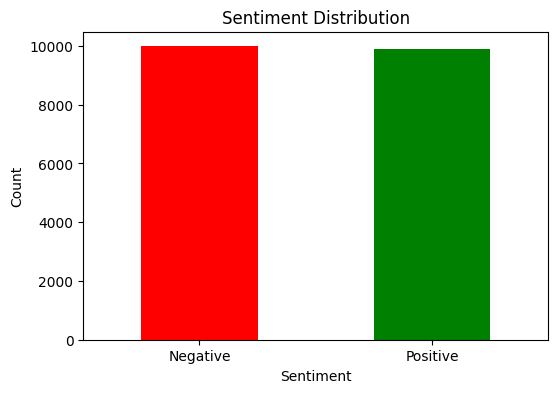

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
df_lstm["Sentiment"].value_counts().plot(kind="bar", color=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()


Step 5: Tokenization and Padding

In [ ]:
# LSTMs require numerical inputs, so we need to tokenize text and apply padding.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 5000  # Vocabulary size
max_len = 100  # Max review length

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_lstm["Clean_Review_Text"])

# Convert text to sequences
X_sequences  = tokenizer.texts_to_sequences(df_lstm["Clean_Review_Text"])

# Pad sequences to have the same length
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Define target variable
y = df_lstm["Sentiment"].values

In [ ]:
# print(X_sequences.len())
print(X_sequences)

[[38, 39], [31, 1, 32], [18, 19, 20, 5], [18, 19, 20, 5], [4, 15, 16, 17], [4, 15, 16, 17], [35, 8, 1, 6], [21, 22, 23, 3], [5, 1, 28], [10, 2, 11, 12], [4, 24], [35, 8, 1, 6], [2, 34, 1, 7], [2, 34, 1, 7], [10, 2, 11, 12], [9, 3, 13, 14], [4, 24], [10, 2, 11, 12], [9, 3, 13, 14], [25, 26, 27], [38, 39], [29, 30, 1, 6], [9, 3, 13, 14], [5, 1, 28], [29, 30, 1, 6], [5, 1, 28], [10, 2, 11, 12], [5, 1, 28], [9, 3, 13, 14], [35, 8, 1, 6], [9, 3, 13, 14], [4, 15, 16, 17], [5, 1, 28], [25, 26, 27], [18, 19, 20, 5], [36, 37], [31, 1, 32], [4, 24], [2, 9, 3], [18, 19, 20, 5], [8, 33, 1, 7], [25, 26, 27], [2, 34, 1, 7], [18, 19, 20, 5], [10, 2, 11, 12], [9, 3, 13, 14], [25, 26, 27], [25, 26, 27], [35, 8, 1, 6], [4, 15, 16, 17], [18, 19, 20, 5], [4, 24], [25, 26, 27], [18, 19, 20, 5], [31, 1, 32], [10, 2, 11, 12], [35, 8, 1, 6], [9, 3, 13, 14], [5, 1, 28], [29, 30, 1, 6], [38, 39], [5, 1, 28], [31, 1, 32], [5, 1, 28], [29, 30, 1, 6], [8, 33, 1, 7], [10, 2, 11, 12], [4, 15, 16, 17], [31, 1, 32], [

In [ ]:
print(X_padded)

[[38 39  0 ...  0  0  0]
 [31  1 32 ...  0  0  0]
 [18 19 20 ...  0  0  0]
 ...
 [10  2 11 ...  0  0  0]
 [36 37  0 ...  0  0  0]
 [ 5  1 28 ...  0  0  0]]


Step 6: Split Data into Train and Test Sets/

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training data (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, ")
print(f"Test size: {len(X_test)}")

Train size: 15908, 
Test size: 3977


Step 7: Build the LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense ,Dropout

model = Sequential([Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
                    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
                    Dense(1, activation="sigmoid")])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 8: Train the Model

In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 75s 140ms/step - accuracy: 0.4963 - loss: 0.6942 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.5021 - loss: 0.6934 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.5005 - loss: 0.6934 - val_accuracy: 0.4961 - val_loss: 0.6939
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.4965 - loss: 0.6936 - val_accuracy: 0.5039 - val_loss: 0.6931


Step 9: Evaluate the Model

In [ ]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

In [ ]:
# Evaluate performance on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5068 - loss: 0.6931
Test Accuracy: 50.39%


Step 10: Predict Sentiment on New Reviews

In [ ]:
def predict_sentiment(text):
    text = clean_text(text)  # Clean the input text
    seq = tokenizer.texts_to_sequences([text])  # Tokenize
    pad = pad_sequences(seq, maxlen=max_len, padding='post')  # Pad
    prediction = model.predict(pad)[0][0]  # Predict
    return "Positive" if prediction > 0.5 else "Negative"

# Example predictions
print(predict_sentiment("I love this product! It's amazing."))
print(predict_sentiment("Worst purchase ever. I regret buying this."))
print(predict_sentiment("Worst purchase ever."))
print(predict_sentiment("I regret buying this."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Negative


Step 11: Save the Model for Future Use

In [ ]:
# Save the trained model
model.save("lstm_sentiment_model.h5")

# Save tokenizer for later use
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


Step 12: Load and Use the Model Later

In [ ]:
from tensorflow.keras.models import load_model

# Load model and tokenizer
model = load_model("lstm_sentiment_model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Predict sentiment for a new review
print(predict_sentiment("This product is okay but not great."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
Negative


In [ ]:
df_lstm

,Product_Name,Review_ID,User_Name,Review_Text,Rating,Is_Useful_In_India,Sentiment,Clean_Review_Text
0,Samsung Galaxy M14,1,Anjali,Too expensive for its features.,2,No,0,expensive features
1,Samsung Galaxy M14,2,Arjun,Good for Indian households.,5,Yes,1,good indian households
2,Samsung Galaxy M14,3,Rohit,"Great performance, highly recommended!",4,Yes,1,great performance highly recommended
4,Samsung Galaxy M14,5,Arjun,"Great performance, highly recommended!",4,Yes,1,great performance highly recommended
5,Samsung Galaxy M14,6,Priya,"Not durable, broke within a month.",2,No,0,durable broke within month
...,...,...,...,...,...,...,...,...
24990,Boat Stone 1200 Bluetooth Speaker,24991,Neha,Better alternatives are available.,1,No,0,better alternatives available
24994,Boat Stone 1200 Bluetooth Speaker,24995,Anjali,Perfectly suited for Indian climate.,5,Yes,1,perfectly suited indian climate
24995,Boat Stone 1200 Bluetooth Speaker,24996,Neha,Best product I have used so far.,4,Yes,1,best product used far
24997,Boat Stone 1200 Bluetooth Speaker,24998,Rahul,Affordable and effective!,5,Yes,1,affordable effective
